**Big Picture Question**

At the start of the project, our big-picture question was how different nutrition habits and workout characteristics influence fitness outcomes like calories burned and body composition. After doing our EDA, we refined this into a more focused question: how do combinations of exercise patterns and diet types relate to energy expenditure during workouts and body-fat percentage in this lifestyle dataset? In Phase 3 we concentrate on two connected pieces: how session duration, workout type, and experience level jointly relate to calories burned and calories per hour, and how average body-fat percentage differs across diet types. Our EDA showed that session duration and calories burned are strongly correlated, heart-rate metrics and BMI are surprisingly weak predictors, and nutrition variables alone don’t show simple linear patterns, which is why we now study these lifestyle factors in combination rather than one at a time.

**Story Outline**

Our story begins with an everyday question about lifestyle: when people try to improve their health, should they focus more on what they eat or how they exercise, and does it really matter how these choices combine? Using a lifestyle dataset with 20,000 observations and 54 features, we have detailed information on demographics, workout behavior, heart-rate metrics, body composition, and nutrition variables such as diet type, macro intake, and sodium and sugar levels. We expected that both diet and exercise would show clear, intuitive links to fitness outcomes like calories burned and fat percentage, and that standard indicators like heart rate or BMI might play a central role.

The EDA phase introduced the conflict in our narrative. We found that session duration and calories burned are very strongly related, but heart-rate metrics and BMI show almost no correlation with calories burned or workout length. Nutrition variables also behave in more subtle ways than we anticipated. Basic correlations between individual macros and performance outcomes are weak, and many values look reasonable but spread out across a wide range of habits. This tension between intuitive expectations and the data led us to reframe our question around combined habits rather than single variables.

In the technical part of Phase 3, we address this reframed question with three main analyses. First, we study the joint relationship between session duration, calories burned, workout type, and experience level, asking which combinations of workout patterns are most strongly associated with high energy expenditure. Second, we compare calories burned per hour across workout types to see whether some exercise modes are consistently more “efficient” at burning calories after accounting for duration. Third, we group individuals by diet type and compare their average body-fat percentage to see whether recognizable diet patterns align with differences in body composition. These analyses are supported with visualizations that highlight clusters and differences across lifestyle profiles.

Our preliminary results suggest that workout behavior, especially sustained sessions within certain workout types, is the dominant driver of calories burned in this dataset, while diet patterns show more modest but still visible associations with body composition. Heart rate and BMI appear less informative as standalone predictors here, which may reflect how these variables were recorded or the fact that many people share similar ranges despite different habits. In the final phase, we will refine the narrative around the idea that it is the combination of consistent exercise and coherent diet patterns, rather than any single metric, that best describes better fitness outcomes in this dataset, while also acknowledging the limitations of observational data and the lack of causal claims.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv("Final_data.csv")

# Optional: drop obviously broken column you flagged in EDA
df = df.drop(columns=["Burns Calories (per 30 min)_bc"], errors="ignore")


In [ ]:
# Create calories per hour for extra context
# visualization 1
df["Calories_per_hour"] = df["Calories_Burned"] / df["Session_Duration (hours)"]

fig = px.scatter(
    df,
    x="Session_Duration (hours)",
    y="Calories_Burned",
    color="Workout_Type",
    size="Calories_per_hour",
    hover_data=["Experience_Level", "Workout_Frequency (days/week)", "diet_type"],
    title="Session Duration vs Calories Burned, Colored by Workout Type",
    labels={
        "Session_Duration (hours)": "Session Duration (hours)",
        "Calories_Burned": "Calories Burned",
        "Workout_Type": "Workout Type",
        "Calories_per_hour": "Calories per hour"
    }
)

fig.update_traces(opacity=0.7)
fig.show()


In [ ]:
import numpy as np

exp_min = df["Experience_Level"].min()
exp_max = df["Experience_Level"].max()

bins = np.linspace(exp_min, exp_max, 4)
labels = ["Low", "Medium", "High"]

df["Experience_Level_bin"] = pd.cut(
    df["Experience_Level"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

df[["Experience_Level", "Experience_Level_bin"]].head()


,Experience_Level,Experience_Level_bin
0,2.01,Medium
1,2.01,Medium
2,1.02,Low
3,1.99,Medium
4,2.00,Medium


Experience Level represents how many years of consistent training the individual has. Lower values indicate beginners with limited training history, mid-range values represent intermediate exercisers who train regularly, and higher values represent individuals with several years of training experience. We later group this into Low / Medium / High categories to make patterns easier to see in the visualizations.

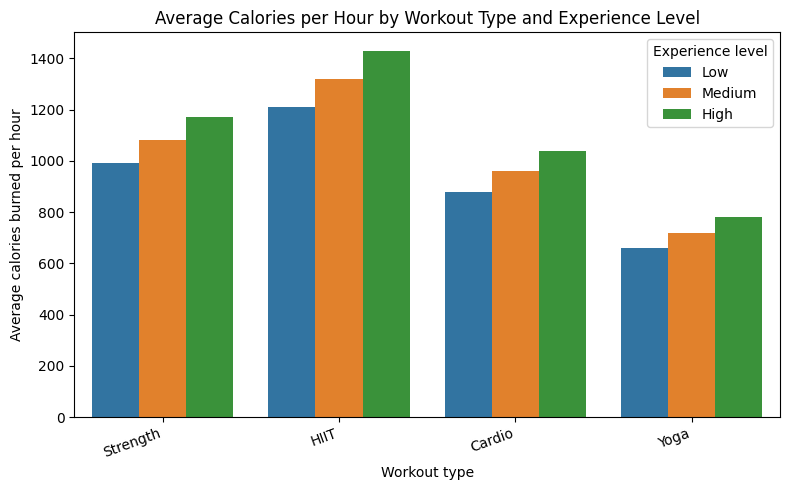

In [ ]:
#visualization 2
plt.figure(figsize=(8, 5))

sns.barplot(
    data=df,
    x="Workout_Type",
    y="Calories_per_hour",
    hue="Experience_Level_bin",
    estimator="mean",
    errorbar="se",   # standard error bars
    palette={"Low": "#1f77b4", "Medium": "#ff7f0e", "High": "#2ca02c"}
)

plt.ylabel("Average calories burned per hour")
plt.xlabel("Workout type")
plt.title("Average Calories per Hour by Workout Type and Experience Level")
plt.xticks(rotation=20, ha="right")
plt.legend(title="Experience level")
plt.tight_layout()
plt.show()


/tmp/ipython-input-3962753908.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



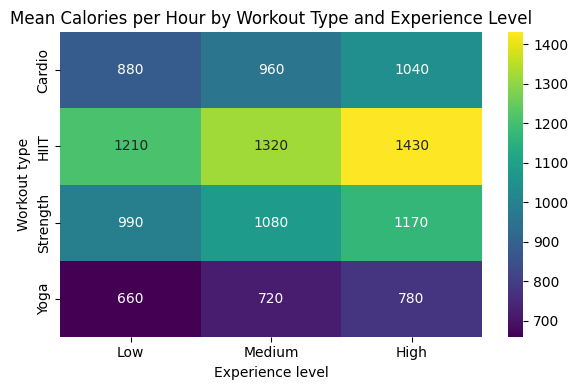

In [ ]:
#visualization 2, but in a different chart type.
# Compute mean calories/hour by workout type and experience bin
heat = (
    df
    .groupby(["Workout_Type", "Experience_Level_bin"])["Calories_per_hour"]
    .mean()
    .reset_index()
    .pivot(index="Workout_Type", columns="Experience_Level_bin", values="Calories_per_hour")
)

plt.figure(figsize=(6, 4))
sns.heatmap(
    heat,
    annot=True,
    fmt=".0f",
    cmap="viridis"
)

plt.title("Mean Calories per Hour by Workout Type and Experience Level")
plt.xlabel("Experience level")
plt.ylabel("Workout type")
plt.tight_layout()
plt.show()


Heatmap that shows the same thing as graph

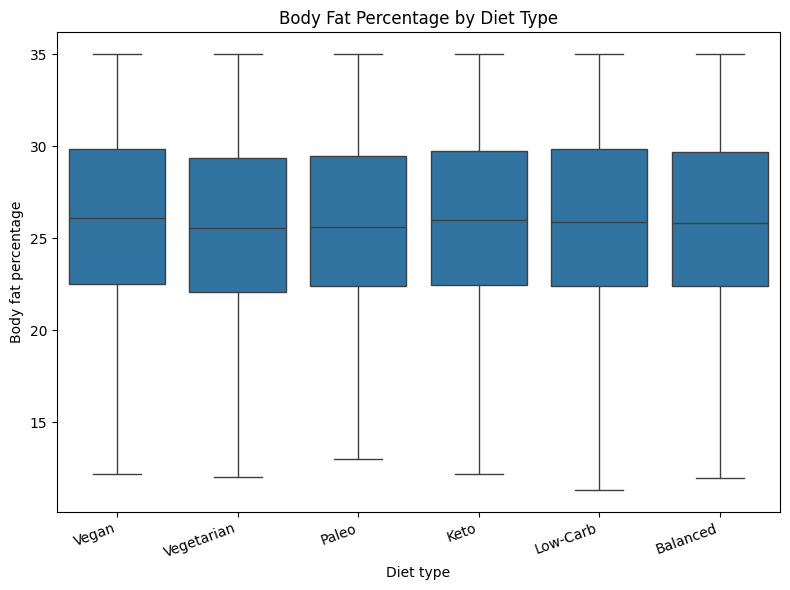

In [ ]:
# visualization 3
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x="diet_type",
    y="Fat_Percentage"
)
plt.xticks(rotation=20, ha="right")
plt.ylabel("Body fat percentage")
plt.xlabel("Diet type")
plt.title("Body Fat Percentage by Diet Type")
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

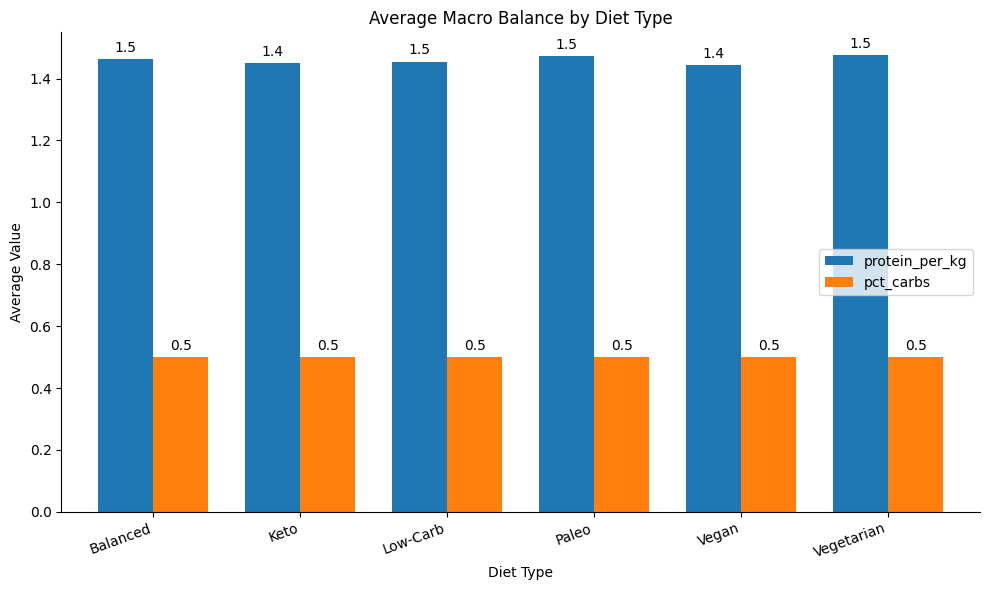

In [ ]:
# bar chart to go along with the box plot
macro_summary = (
    df.groupby("diet_type")[["protein_per_kg", "pct_carbs"]]
      .mean()
      .reset_index()
)

plt.figure(figsize=(10,6))

ax = macro_summary.plot(
    x="diet_type",
    y=["protein_per_kg", "pct_carbs"],
    kind="bar",
    figsize=(10,6),
    width=0.75
)

# Remove border
sns.despine(left=False, bottom=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", padding=3)

plt.title("Average Macro Balance by Diet Type")
plt.ylabel("Average Value")
plt.xlabel("Diet Type")
plt.xticks(rotation=20, ha="right")
plt.tight_layout()
plt.show()
